In [2]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.19.0


### Tensor

In [3]:
# Simple Tensors
a = tf.constant([[1,2],[3,4]])
print(a)
a = tf.random.normal(shape=(10,3))
print(a)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[ 0.25102624  1.4088442  -0.26785928]
 [ 1.9406533   1.2183262   2.2927103 ]
 [-1.0498152   0.6788453   0.9974992 ]
 [ 1.7176996  -0.5726755  -0.11309607]
 [ 0.7654475  -0.07678945 -0.6909034 ]
 [ 0.41023076 -0.14060211  2.2997255 ]
 [-1.0243208   0.08886398 -1.1842885 ]
 [-1.5823302  -0.07824718 -1.2612336 ]
 [ 1.6561967   0.552185    0.44847733]
 [-0.553807    0.02260866  1.1811088 ]], shape=(10, 3), dtype=float32)


In [4]:
# To extract numpy-array from tensor, use .numpy()
print(a-a[0])
print(tf.exp(a)[0].numpy())

tf.Tensor(
[[ 0.          0.          0.        ]
 [ 1.689627   -0.19051802  2.5605695 ]
 [-1.3008415  -0.72999895  1.2653584 ]
 [ 1.4666734  -1.9815197   0.1547632 ]
 [ 0.5144212  -1.4856337  -0.42304415]
 [ 0.15920451 -1.5494463   2.5675848 ]
 [-1.2753471  -1.3199803  -0.9164292 ]
 [-1.8333565  -1.4870914  -0.9933743 ]
 [ 1.4051704  -0.85665923  0.7163366 ]
 [-0.8048333  -1.3862356   1.4489682 ]], shape=(10, 3), dtype=float32)
[1.2853439 4.091224  0.7650154]


### Variables

In [5]:
# to get a sum of all rows of tensor a
s = tf.Variable(tf.zeros_like(a[0]))
print(s)
for i in a:
    s.assign_add(i)

print(s)

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([2.5309808, 3.1013598, 3.7021403], dtype=float32)>


In [6]:
# Much better way to do it:
tf.reduce_sum(a,axis=0)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([2.5309808, 3.1013598, 3.7021403], dtype=float32)>

### Computing Gradients

In [7]:
a = tf.random.normal(shape=(2, 2))
b = tf.random.normal(shape=(2, 2))

with tf.GradientTape() as tape:
    tape.watch(a)  # Start recording the history of operations applied to `a`
    c = tf.sqrt(tf.square(a) + tf.square(b))  # Do some math using `a`
    # What's the gradient of `c` with respect to `a`?
    dc_da = tape.gradient(c, a)
    print(dc_da)

tf.Tensor(
[[ 0.2737922  -0.55411744]
 [ 0.40453687 -0.6141799 ]], shape=(2, 2), dtype=float32)


### Example 1: Linear Regression

#### Generate some random data

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
import random

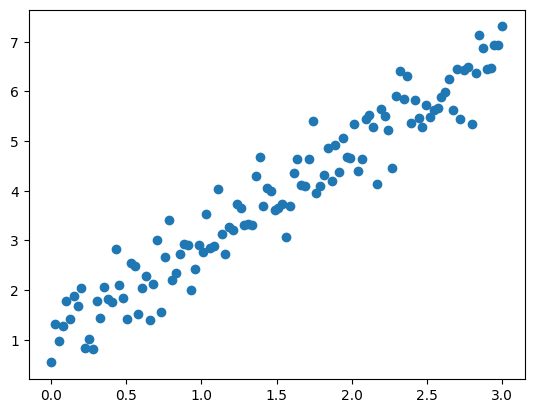

In [9]:
np.random.seed(13) # pick the seed for reproducability - change it to explore the effects of random variations

train_x = np.linspace(0, 3, 120)
train_labels = 2 * train_x + 0.9 + np.random.randn(*train_x.shape) * 0.5

plt.scatter(train_x,train_labels)

#### define model and loss function

In [10]:
input_dim = 1
output_dim = 1
learning_rate = 0.1

# This is our weight matrix
w = tf.Variable([[100.0]])
print(w)
# This is our bias vector
b = tf.Variable(tf.zeros(shape=(output_dim,)))
print(b)

def f(x):
    return tf.matmul(x,w) + b

def compute_loss(labels, predictions):
    return tf.reduce_mean(tf.square(labels - predictions))

<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[100.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


#### Training the model

In [11]:
def train_on_batch(x, y):
    with tf.GradientTape() as tape:
        predictions = f(x)
        loss = compute_loss(y, predictions)
        # Note that `tape.gradient` works with a list as well (w, b).
        dloss_dw, dloss_db = tape.gradient(loss, [w, b])
    w.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    return loss

In [12]:
# Shuffle the data.
indices = np.random.permutation(len(train_x))
features = tf.constant(train_x[indices],dtype=tf.float32)
labels = tf.constant(train_labels[indices],dtype=tf.float32)

In [13]:
batch_size = 4
for epoch in range(10):
    for i in range(0,len(features),batch_size):
        loss = train_on_batch(tf.reshape(features[i:i+batch_size],(-1,1)),tf.reshape(labels[i:i+batch_size],(-1,1)))
    print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 0: last batch loss = 94.5247
Epoch 1: last batch loss = 9.3428
Epoch 2: last batch loss = 1.4166
Epoch 3: last batch loss = 0.5224
Epoch 4: last batch loss = 0.3807
Epoch 5: last batch loss = 0.3495
Epoch 6: last batch loss = 0.3413
Epoch 7: last batch loss = 0.3390
Epoch 8: last batch loss = 0.3384
Epoch 9: last batch loss = 0.3382


In [14]:
w,b

(<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[1.8616778]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.0710956], dtype=float32)>)

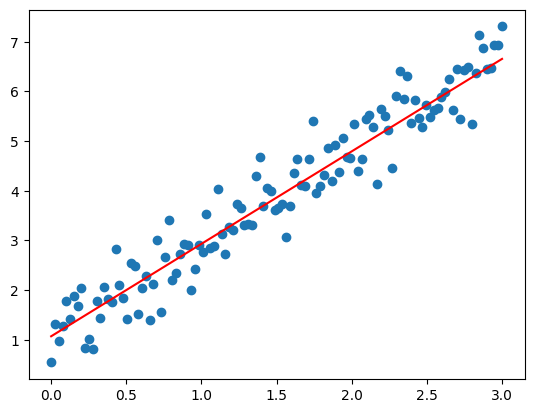

In [15]:
plt.scatter(train_x,train_labels)
x = np.array([min(train_x),max(train_x)])
y = w.numpy()[0,0]*x+b.numpy()[0]
plt.plot(x,y,color='red')

### Example 2: Classification

#### Generate some random data

In [16]:
np.random.seed(0) # pick the seed for reproducibility - change it to explore the effects of random variations

n = 100
X, Y = make_classification(n_samples = n, n_features=2,
                           n_redundant=0, n_informative=2, flip_y=0.05,class_sep=1.5)
X = X.astype(np.float32)
Y = Y.astype(np.int32)

split = [ 70*n//100, (15+70)*n//100 ]
train_x, valid_x, test_x = np.split(X, split)
train_labels, valid_labels, test_labels = np.split(Y, split)

In [17]:
def plot_dataset(features, labels, W=None, b=None):
    # prepare the plot
    fig, ax = plt.subplots(1, 1)
    ax.set_xlabel('$x_i[0]$ -- (feature 1)')
    ax.set_ylabel('$x_i[1]$ -- (feature 2)')
    colors = ['r' if l else 'b' for l in labels]
    ax.scatter(features[:, 0], features[:, 1], marker='o', c=colors, s=100, alpha = 0.5)
    if W is not None:
        min_x = min(features[:,0])
        max_x = max(features[:,1])
        min_y = min(features[:,1])*(1-.1)
        max_y = max(features[:,1])*(1+.1)
        cx = np.array([min_x,max_x],dtype=np.float32)
        cy = (0.5-W[0]*cx-b)/W[1]
        ax.plot(cx,cy,'g')
        ax.set_ylim(min_y,max_y)
    fig.show()

C:\Users\lvgy\AppData\Local\Temp\ipykernel_3680\1767890495.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


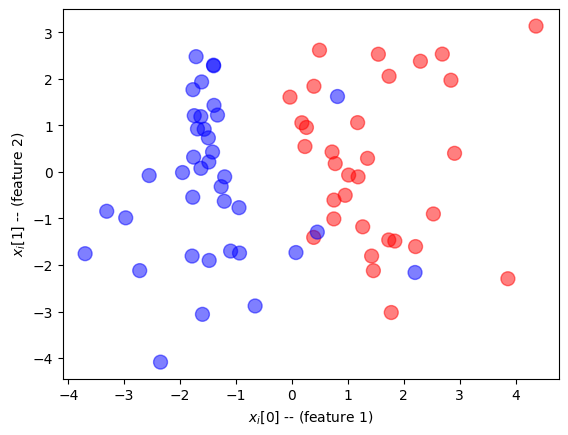

In [18]:
plot_dataset(train_x, train_labels)

#### Normalizing Data

In [19]:
train_x_norm = (train_x-np.min(train_x)) / (np.max(train_x)-np.min(train_x))
valid_x_norm = (valid_x-np.min(train_x)) / (np.max(train_x)-np.min(train_x))
test_x_norm = (test_x-np.min(train_x)) / (np.max(train_x)-np.min(train_x))

#### Training One-Layer Perceptron

In [20]:
W = tf.Variable(tf.random.normal(shape=(2,1)),dtype=tf.float32)
b = tf.Variable(tf.zeros(shape=(1,),dtype=tf.float32))

learning_rate = 0.1

@tf.function
def train_on_batch(x, y):
    with tf.GradientTape() as tape:
        z = tf.matmul(x, W) + b
        loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y,logits=z))
    dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    return loss

In [21]:
# Create a tf.data.Dataset object for easy batched iteration
dataset = tf.data.Dataset.from_tensor_slices((train_x_norm.astype(np.float32), train_labels.astype(np.float32)))
dataset = dataset.shuffle(128).batch(2)

for epoch in range(10):
    for step, (x, y) in enumerate(dataset):
        loss = train_on_batch(x, tf.expand_dims(y,1))
    print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 0: last batch loss = 0.6261
Epoch 1: last batch loss = 0.4183
Epoch 2: last batch loss = 0.5151
Epoch 3: last batch loss = 0.3882
Epoch 4: last batch loss = 0.5029
Epoch 5: last batch loss = 0.4790
Epoch 6: last batch loss = 0.5223
Epoch 7: last batch loss = 1.2460
Epoch 8: last batch loss = 0.2788
Epoch 9: last batch loss = 0.3614


C:\Users\lvgy\AppData\Local\Temp\ipykernel_3680\1767890495.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


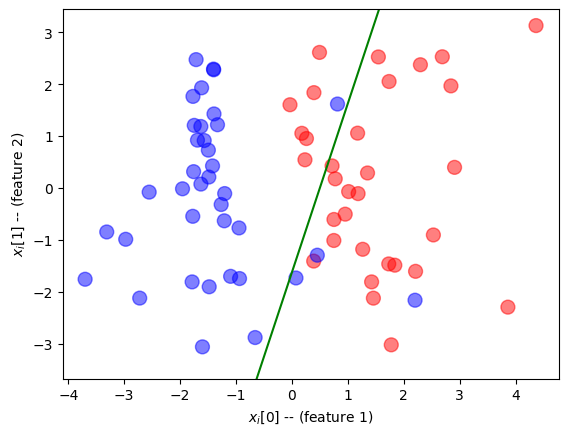

In [22]:
plot_dataset(train_x,train_labels,W.numpy(),b.numpy())

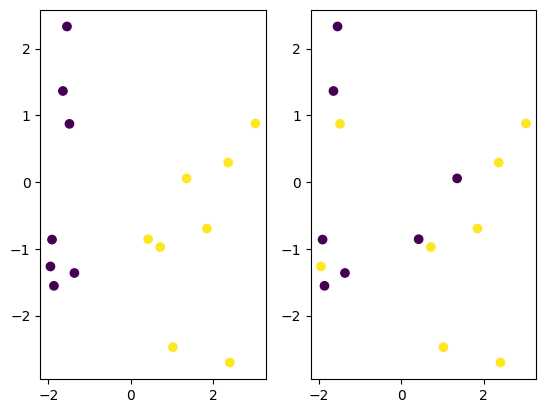

In [23]:
pred = tf.matmul(test_x,W)+b
fig,ax = plt.subplots(1,2)
ax[0].scatter(test_x[:,0],test_x[:,1],c=pred[:,0]>0.5)
ax[1].scatter(test_x[:,0],test_x[:,1],c=valid_labels)

In [24]:
tf.reduce_mean(tf.cast(((pred[0]>0.5)==test_labels),tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=0.46666666865348816>

### Using TensorFlow/Keras Optimizers

In [25]:
optimizer = tf.keras.optimizers.Adam(0.01)

W = tf.Variable(tf.random.normal(shape=(2,1)))
b = tf.Variable(tf.zeros(shape=(1,),dtype=tf.float32))

@tf.function
def train_on_batch(x, y):
    vars = [W, b]
    with tf.GradientTape() as tape:
        z = tf.sigmoid(tf.matmul(x, W) + b)
        loss = tf.reduce_mean(tf.keras.losses.binary_crossentropy(z,y))
        correct_prediction = tf.equal(tf.round(y), tf.round(z))
        acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        grads = tape.gradient(loss, vars)
        optimizer.apply_gradients(zip(grads,vars))
    return loss,acc

for epoch in range(20):
    for step, (x, y) in enumerate(dataset):
        loss,acc = train_on_batch(tf.reshape(x,(-1,2)), tf.reshape(y,(-1,1)))
    print('Epoch %d: last batch loss = %.4f, acc = %.4f' % (epoch, float(loss),acc))

Epoch 0: last batch loss = 8.4002, acc = 0.5000
Epoch 1: last batch loss = 8.1297, acc = 0.5000
Epoch 2: last batch loss = 7.7476, acc = 0.5000
Epoch 3: last batch loss = 9.4475, acc = 0.0000
Epoch 4: last batch loss = 7.8971, acc = 0.5000
Epoch 5: last batch loss = 8.6549, acc = 0.0000
Epoch 6: last batch loss = 7.4503, acc = 0.5000
Epoch 7: last batch loss = 8.0015, acc = 0.5000
Epoch 8: last batch loss = 9.4254, acc = 0.0000
Epoch 9: last batch loss = 7.6715, acc = 0.5000
Epoch 10: last batch loss = 6.6700, acc = 1.0000
Epoch 11: last batch loss = 7.1234, acc = 0.5000
Epoch 12: last batch loss = 7.7365, acc = 0.5000
Epoch 13: last batch loss = 6.9591, acc = 0.5000
Epoch 14: last batch loss = 6.8363, acc = 1.0000
Epoch 15: last batch loss = 7.4768, acc = 1.0000
Epoch 16: last batch loss = 6.5287, acc = 1.0000
Epoch 17: last batch loss = 6.2364, acc = 1.0000
Epoch 18: last batch loss = 7.1870, acc = 1.0000
Epoch 19: last batch loss = 6.6534, acc = 1.0000


### Functional API

In [26]:
inputs = tf.keras.Input(shape=(2,))
z = tf.keras.layers.Dense(1,kernel_initializer='glorot_uniform',activation='sigmoid')(inputs)
model = tf.keras.models.Model(inputs,z)

model.compile(tf.keras.optimizers.Adam(0.1),'binary_crossentropy',['accuracy'])
model.summary()
h = model.fit(train_x_norm,train_labels,batch_size=8,epochs=15)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15


ValueError: dtype='string' is not a valid dtype for Keras type promotion.

In [27]:
plt.plot(h.history['accuracy'])

NameError: name 'h' is not defined